In [1]:

from sre_constants import RANGE_UNI_IGNORE
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import time
from keras.datasets import mnist
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics import confusion_matrix
import seaborn as sn
%matplotlib inline
#----------------------------------
# Load the data
#----------------------------------
(x_train, y_train), (x_test, y_test) = mnist.load_data()
nClass = 10
nTrain = 60000
nTest  = 10000
sX = 28
sY = 28
dim = sX*sY
# Flatten the training data
x_train = x_train.reshape(nTrain,dim)
x_test  = x_test.reshape(nTest,dim)

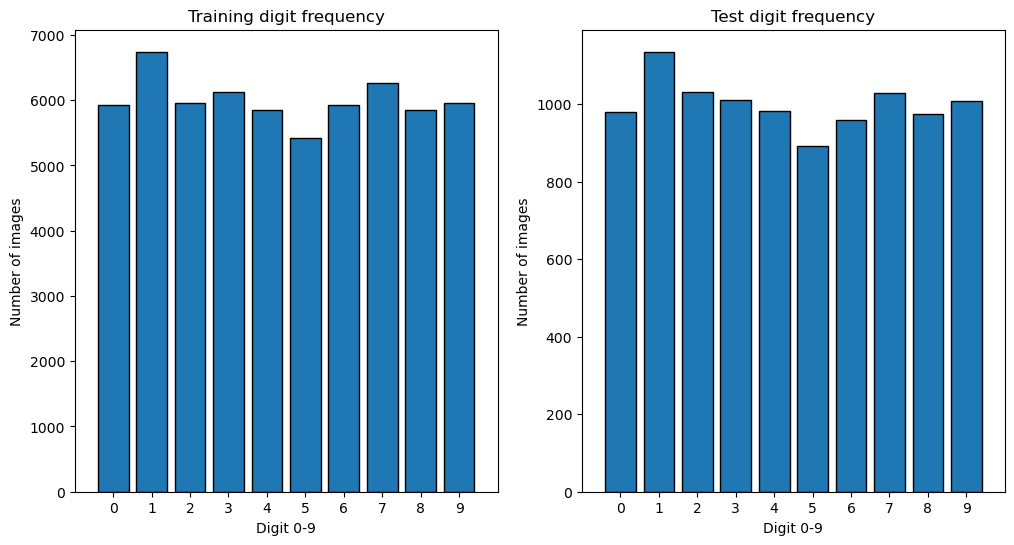

In [2]:
#display the histogram of the data
def plot_digit_frequency_histogram(x_train, y_train, x_test, y_test):
    # Calculate training and testing digit frequencies
    train_digit_freq = np.bincount(y_train)
    test_digit_freq = np.bincount(y_test)

    # Set up the plot
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Plot training digit frequency histogram
    ax[0].bar(range(10), train_digit_freq, width=0.8, align='center', edgecolor='black')
    ax[0].set(xticks=range(10), xlim=[-1, 10], xlabel="Digit 0-9", ylabel="Number of images", title="Training digit frequency")

    # Plot testing digit frequency histogram
    ax[1].bar(range(10), test_digit_freq, width=0.8, align='center', edgecolor='black')
    ax[1].set(xticks=range(10), xlim=[-1, 10], xlabel="Digit 0-9", ylabel="Number of images", title="Test digit frequency")

    # Display the plot
    plt.show()
plot_digit_frequency_histogram(x_train, y_train, x_test, y_test)

In [3]:
#split training data into 10 parts by number
digit_group_train = {}
digit_group_test = {}
for i in range(10):
    digit_group_train[i] = x_train[y_train == i]  
for i in range(10):
    digit_group_test[i] = x_test[y_test==i]  

In [4]:
# The K-means algorithm can be run for each group to get the centers of each cluster:
from sklearn.cluster import KMeans
cluster_centers = []
for i in range(10):
    kmeans = KMeans(n_clusters=9, random_state=0)
    kmeans.fit(digit_group_train[i])
    cluster_centers.append(kmeans.cluster_centers_)
cluster_centers = np.array(cluster_centers)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
def show_cluster_centers(number):
    fig,axs = plt.subplots(3,3,figsize=(8,8))
    plt.gray()
    for i,ax in enumerate(axs.flat):
        ax.imshow(cluster_centers[number][i].reshape(28,28),cmap='gray')
        ax.axis('off')
        ax.set_title('Digit 0 cluster {}'.format(i))


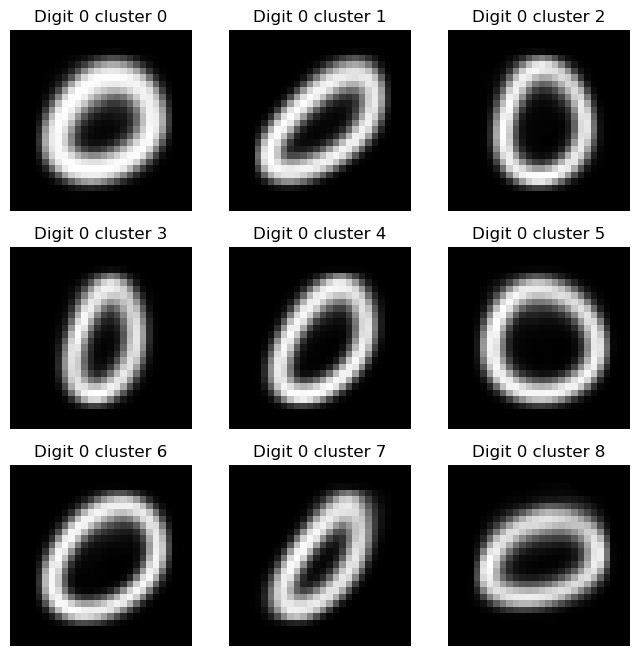

In [6]:
show_cluster_centers(0)

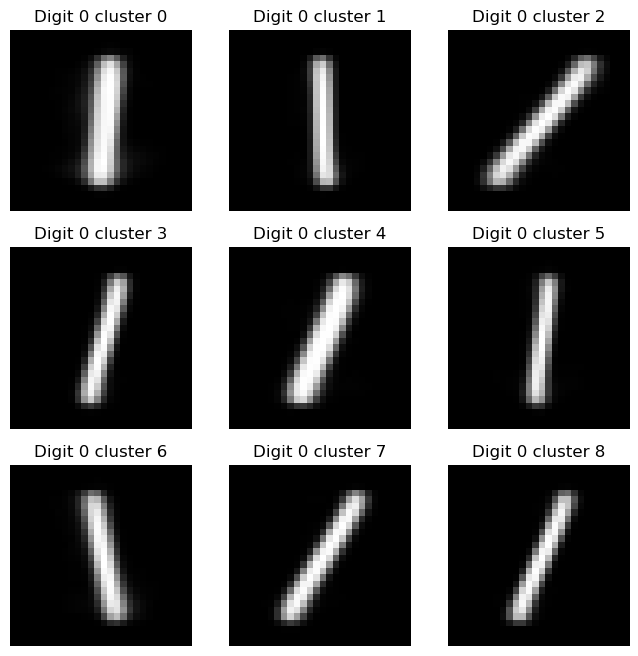

In [248]:
show_cluster_centers(1)

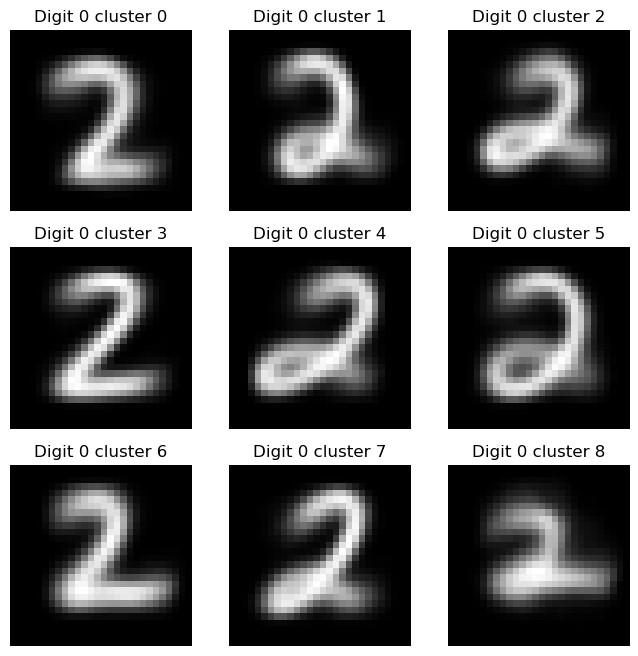

In [249]:
show_cluster_centers(2)

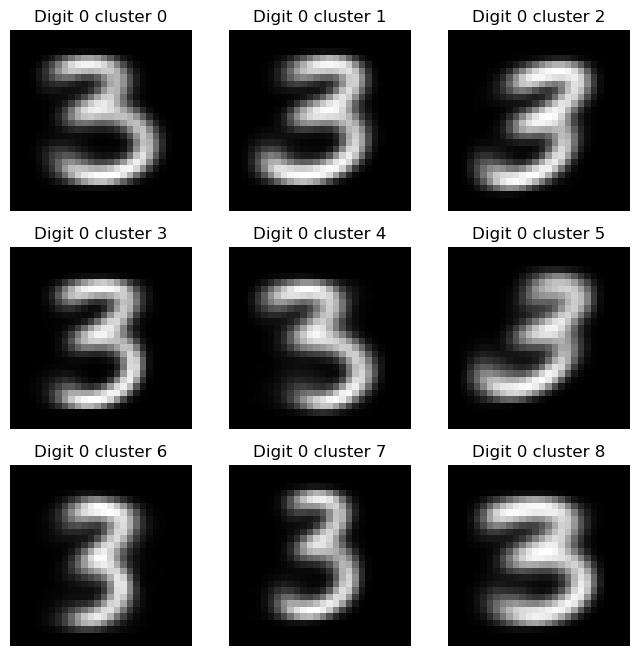

In [250]:
show_cluster_centers(3)

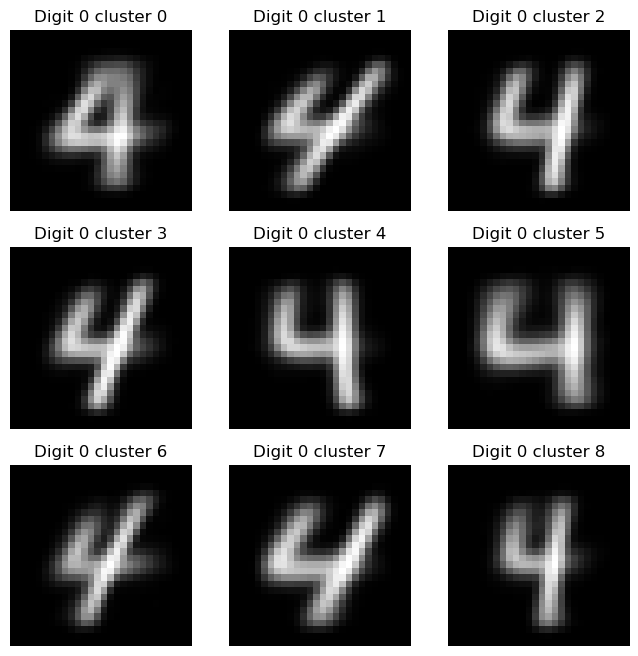

In [251]:
show_cluster_centers(4)

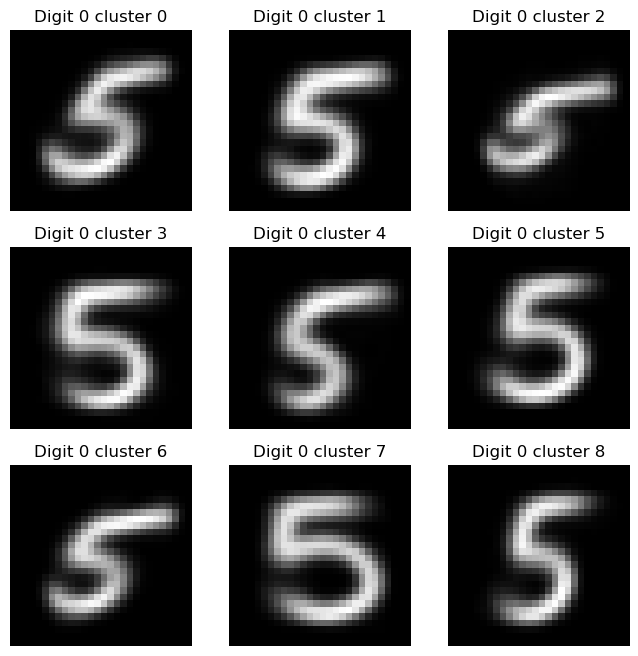

In [252]:
show_cluster_centers(5)

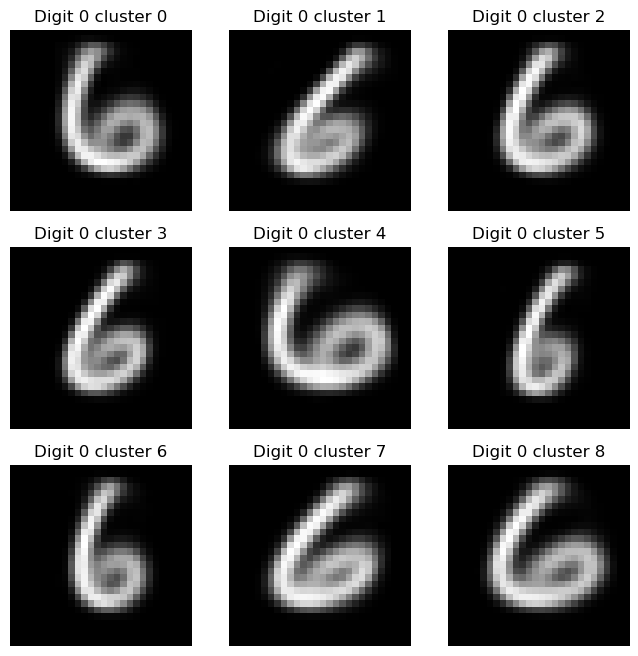

In [253]:
show_cluster_centers(6)

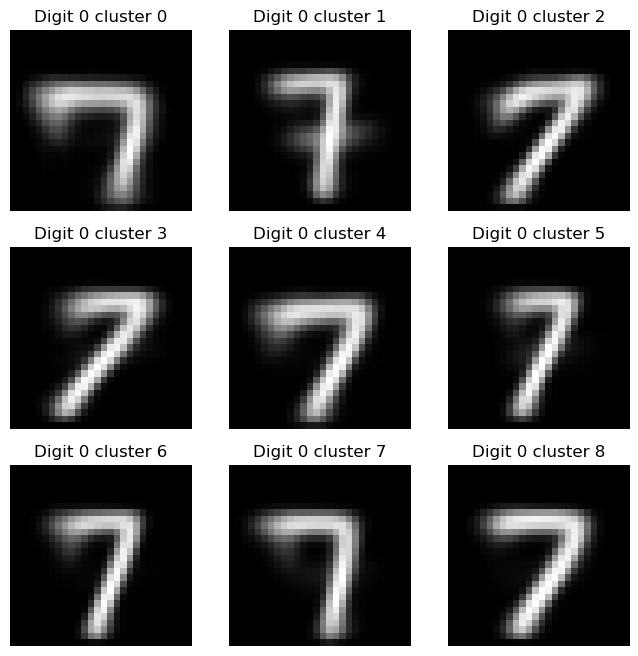

In [254]:
show_cluster_centers(7)

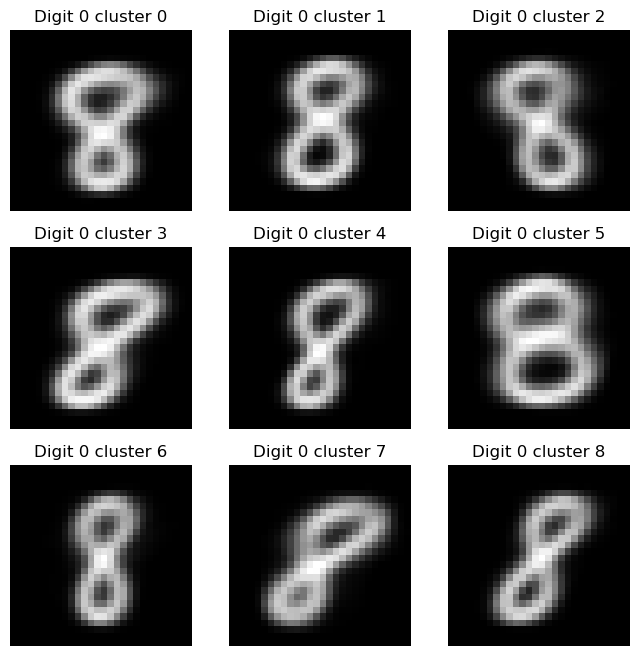

In [255]:
show_cluster_centers(8)

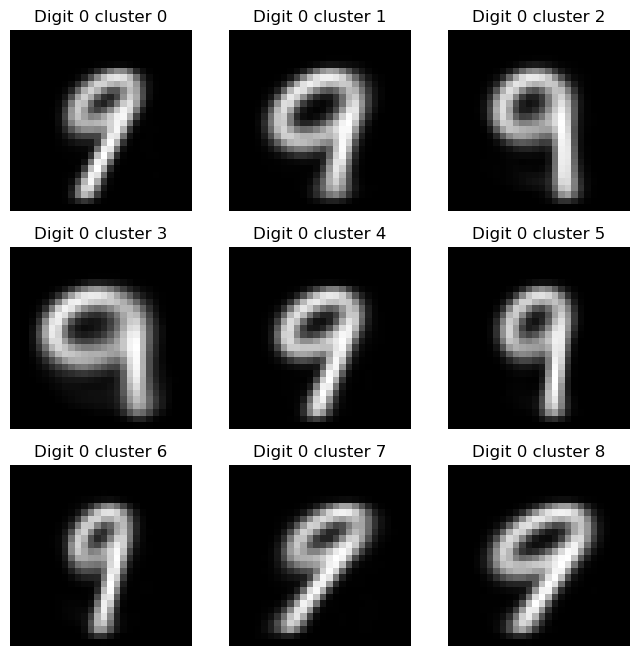

In [256]:
show_cluster_centers(9)

In [7]:
# use KNN to predict the label of the test data
from sklearn.neighbors import KNeighborsClassifier
cluster_centers = cluster_centers.reshape(90,dim)
cluster_centers_lable = np.array([i for i in range(10) for j in range(9)])
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(cluster_centers,cluster_centers_lable)

KNeighborsClassifier(n_neighbors=1)

In [8]:
# predict the label of the test data
start_time = time.time()
x_pred = neigh.predict(x_test)
score = neigh.score(x_test,y_test)
end_time = time.time()
time = end_time - start_time

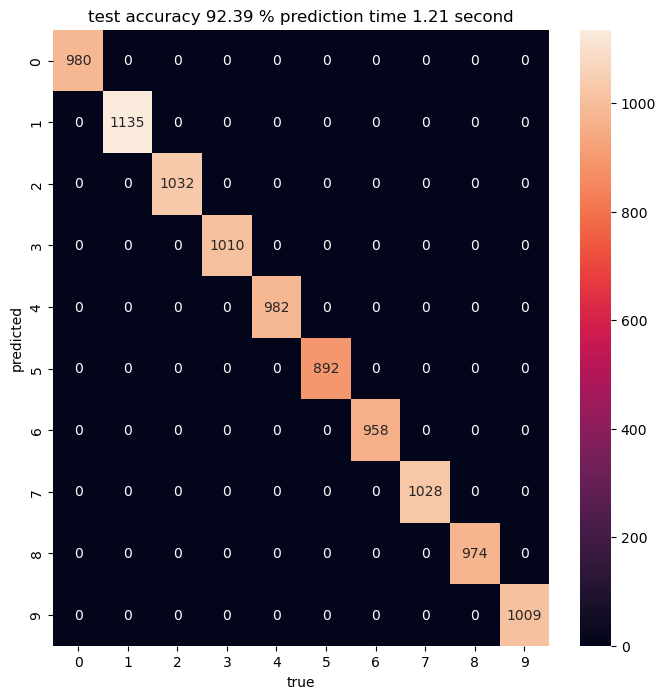

In [302]:
confusion = confusion_matrix(y_test, y_test)
plt.figure(figsize=(8,8))
sn.heatmap(confusion, annot=True, fmt=".4g")
# time only keep two decimal places
plt.title('test accuracy {} % prediction time {} second'.format(score*100,round(time,2)))
plt.xlabel('true')
plt.ylabel('predicted')
plt.show()

In [303]:
# you must display the closest cluster for the first 20 testing image
test = x_test[:20]
test_lable = y_test[:20]
#  acquire the closest cluster for the first 20 testing image
distances , indices = neigh.kneighbors(test)
closest_cluster = cluster_centers[indices]
indices= indices.squeeze()

In [304]:
#display the test[0] image and its closest cluster
def plot_test_cluster(number):
    # Set up the plot
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    
    # Plot training digit frequency histogram
    ax[0].imshow(test[number].reshape(28,28), cmap='gray')
    ax[0].axis('off')
    ax[0].set_title('test {} lable {}'.format(number,test_lable[number]))

    # Plot testing digit frequency histogram
    ax[1].imshow(closest_cluster[number].reshape(28,28), cmap='gray')
    ax[1].axis('off')
    ax[1].set_title('closest digit {} cluster {}'.format(indices[number]//10,indices[number]%10))


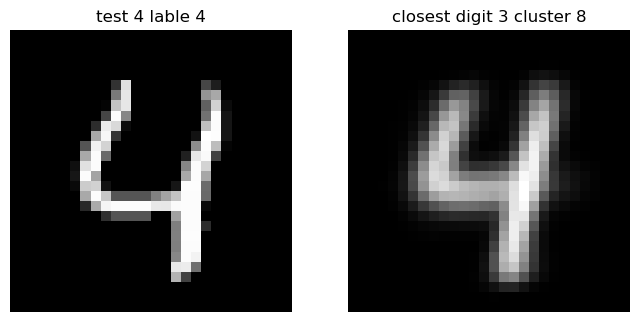

In [305]:
plot_test_cluster(4)

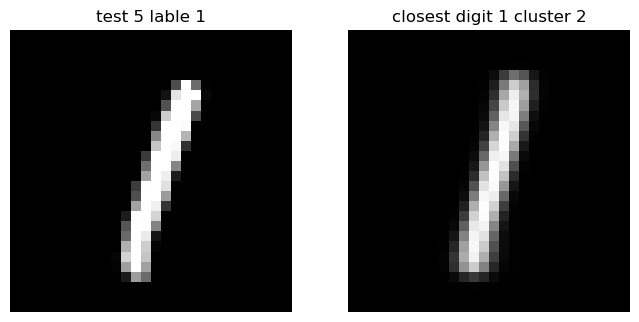

In [291]:
plot_test_cluster(5)

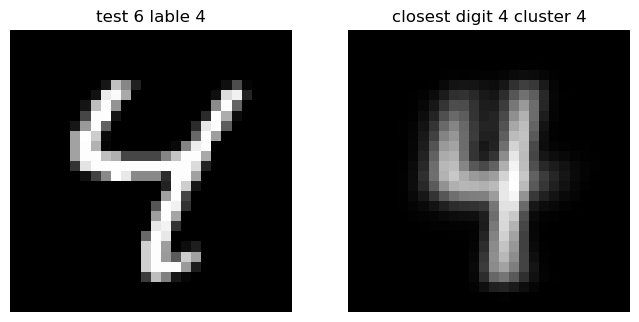

In [265]:
plot_test_cluster(6)

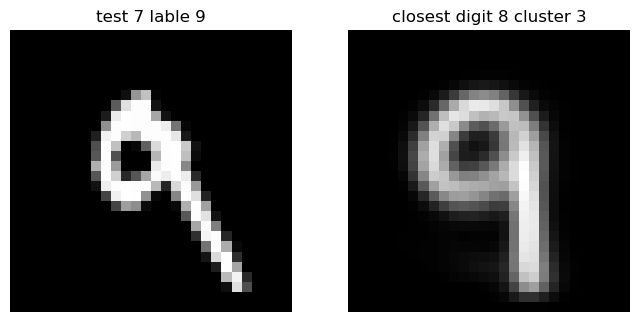

In [266]:
plot_test_cluster(7)

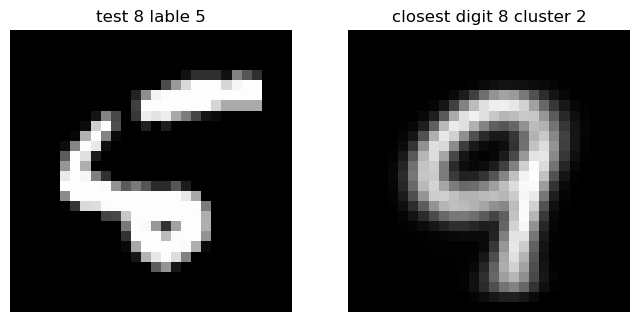

In [267]:
plot_test_cluster(8)

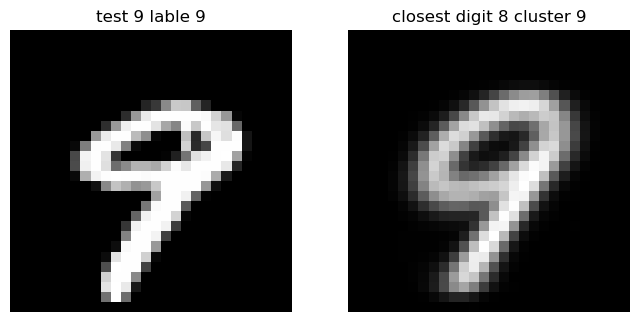

In [268]:
plot_test_cluster(9)

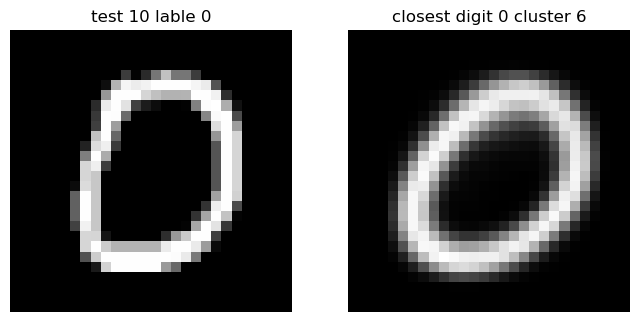

In [269]:
plot_test_cluster(10)

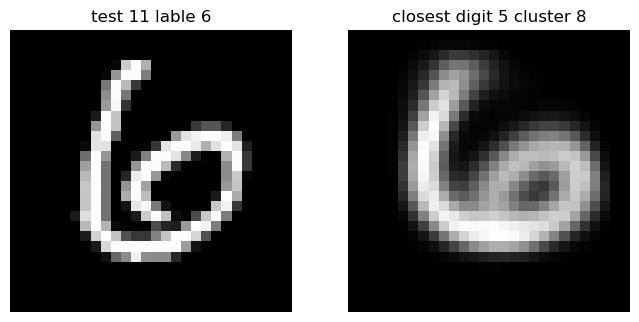

In [270]:
plot_test_cluster(11)

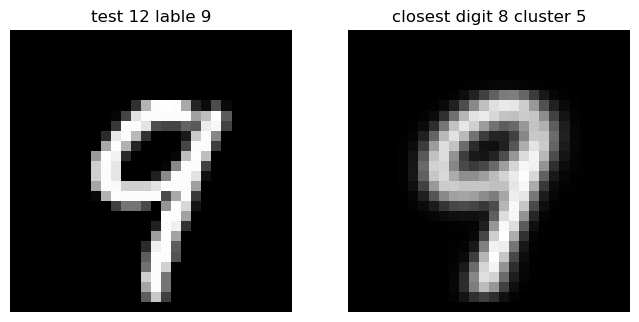

In [271]:
plot_test_cluster(12)

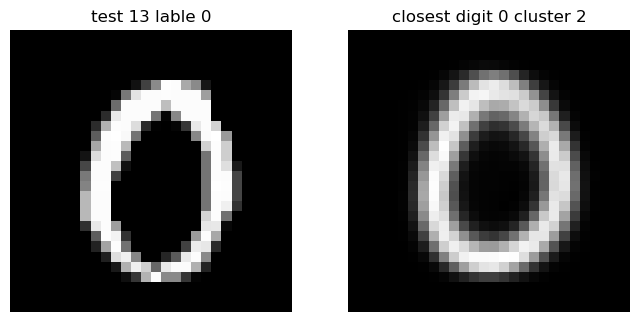

In [272]:
plot_test_cluster(13)

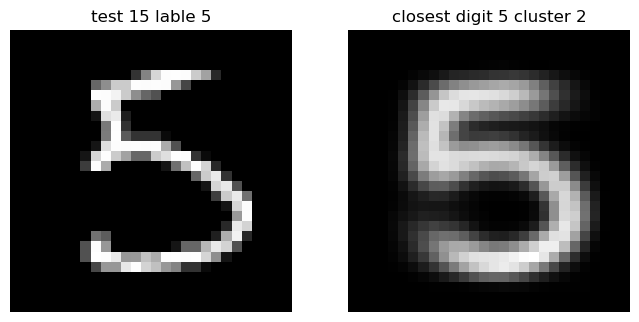

In [273]:
plot_test_cluster(15)

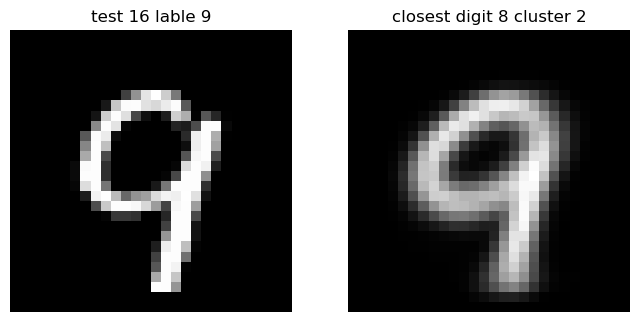

In [274]:
plot_test_cluster(16)

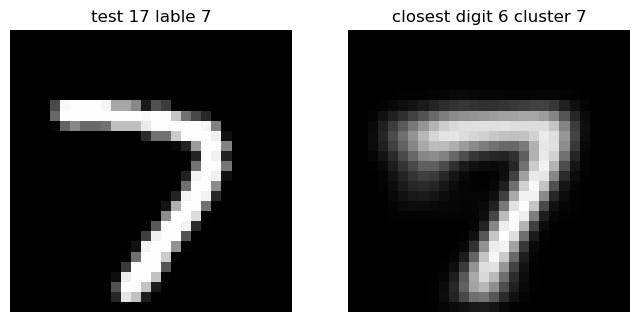

In [275]:
plot_test_cluster(17)

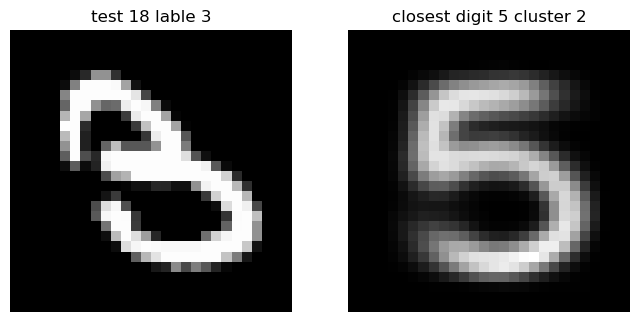

In [276]:
plot_test_cluster(18)

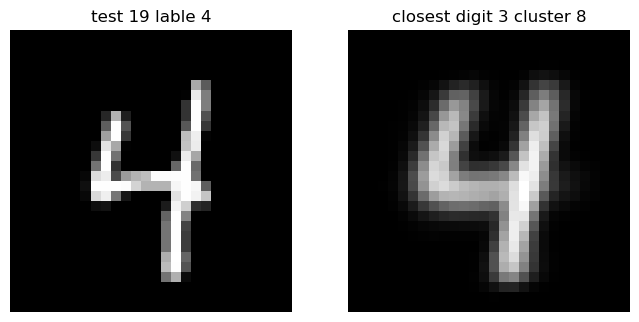

In [277]:
plot_test_cluster(19)